# Machine learning para previsão dos sobreviventes do Titanic
Neste notebook, usamos incialmente os modelos de florestas aleatórias e de suport vector machines para prever se um passageiro sobreviveu ou não ao Titanic. Porém, ambos não resultaram em uma acurácia satisfatória. Ao final, usamos o modelo de regressão logística e escolhemos este modelo como o de melhor performance.
Antes de realizar o modelo, fizemos um extenso tratamento de dados.

## Importação da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/BasesDeDados/Grupo_IA/titanic_test.csv')
df_train = pd.read_csv('/content/drive/My Drive/BasesDeDados/Grupo_IA/titanic_train.csv')

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Tratamento dos dados

In [ ]:
pd.merge(df_test, df_train, on=['Ticket'], how='inner')[['PassengerId_y', 'Survived', 'Pclass_y', 'Name_y', 'Sex_y', 'Age_y', 'SibSp_y',
       'Parch_y', 'Ticket', 'Fare_y', 'Cabin_y', 'Embarked_y']].head(3)

,PassengerId_y,Survived,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket,Fare_y,Cabin_y,Embarked_y
0,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
1,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
2,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0000,NaN,S


In [ ]:
df_aux = pd.merge(df_test, df_train, on=['Ticket'], how='inner')[['PassengerId_y', 'Survived', 'Pclass_y', 'Name_y', 'Sex_y', 'Age_y', 'SibSp_y',
       'Parch_y', 'Ticket', 'Fare_y', 'Cabin_y', 'Embarked_y']]

In [ ]:
colunas = {
    'PassengerId_y': 'PassengerId',
    'Pclass_y': 'Pclass',
    'Name_y': 'Name',
    'Sex_y': 'Sex',
    'Age_y': 'Age',
    'SibSp_y': 'SibSp',
    'Parch_y': 'Parch',
    'Parch_y': 'Parch',
    'Fare_y': 'Fare',
    'Cabin_y': 'Cabin',
    'Embarked_y': 'Embarked'
}

In [ ]:
df_aux = df_aux.rename(columns=colunas)

In [ ]:
df_aux.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
1,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
2,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0000,NaN,S


In [ ]:
df_aux.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             63
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         0
dtype: int64

In [ ]:
df_test = df_aux

In [ ]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df_train.loc[df_train.Embarked.isnull(), 'Embarked'] = "S"

In [ ]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

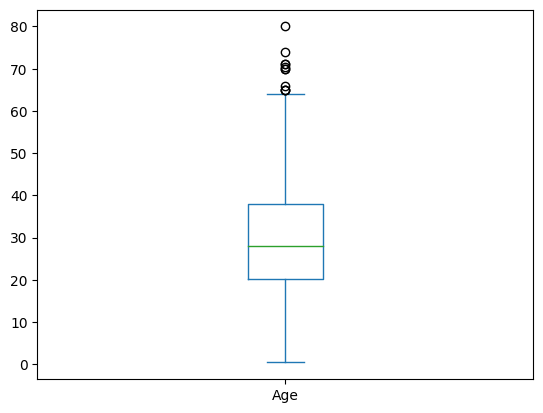

In [ ]:
df_train.Age.plot.box()

In [ ]:
df_train.Age.median()

28.0

In [ ]:
df_train.groupby(["Pclass","Sex"]).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [ ]:
df_train.groupby(["Pclass","Sex"]).Age.transform("median")

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df_train["Age"] = df_train['Age'].fillna(df_train.groupby(["Pclass","Sex"]).Age.transform("median"))

Fizemos este procedimento, pois havia um grande número de idades faltantes. Para isso, preenchemos os dados nulos com a mediana por classe e por sexo.

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df_train = df_train.drop(['Cabin'], axis=1)

Achamos que a variável "Cabin" não ia agregar ao estudo; por isso, abdicamos dela.

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Aqui notamos que a variável "Fare" tem um desvio padrão alto.

In [ ]:
df_train[df_train.Fare == df_train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


Segundo o [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/), esse valor de 512 é razoável.

In [ ]:
df_train = df_train.drop(["Name", "Ticket", "PassengerId"], axis=1)

As variáveis "Ticket", "PassengerId" e "Name" não agregam para o estudo, pois são valores únicos.

In [ ]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df_test.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
1,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
2,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0000,NaN,S


In [ ]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             63
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         0
dtype: int64

In [ ]:
df_test = df_test.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1)

In [ ]:
df_test["Age"] = df_test['Age'].fillna(df_test.groupby(["Pclass","Sex"]).Age.transform("median"))

In [ ]:
df_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_train[["Pclass", "Sex", "Embarked"]].nunique()

Pclass      3
Sex         2
Embarked    3
dtype: int64

In [ ]:
pd.get_dummies(df_train, columns=['Pclass', 'Sex', 'Embarked'])

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,21.5,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Pclass', 'Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Embarked'])

In [ ]:
df_train.drop(['Sex_male', 'Pclass_3', 'Embarked_S'], axis=1)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,0
887,1,19.0,0,0,30.0000,1,0,1,0,0
888,0,21.5,1,2,23.4500,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,1,0


In [ ]:
df_train = df_train.drop(['Sex_male', 'Pclass_3', 'Embarked_S'], axis=1)

In [ ]:
df_test = df_test.drop(['Sex_male', 'Pclass_3', 'Embarked_S'], axis=1)

### Metadados depois do tratamento
| **Variável** |        **Descrição**        |   **Key**   |
|:------------:|:---------------------------:|:-----------:|
|   Survived   |    Survival - CLASS LABEL   | 0=não,1=sim |
|      Age     |        Idade em anos        |             |
|     SibSp    | # de irmãos/cônjuges abordo |             |
|     Parch    |   # de pais/filhos abordo   |             |
|     Fare     |      Preço da passagem      |             |
|   Pclass_1   |       Primeira classe       | 0=não,1=sim |
|   Pclass_2   |        Segunda classe       | 0=não,1=sim |
|  Sex_female  |            Mulher           | 0=não,1=sim |
|  Embarked_C  |    Embarcou em Cherbourg    | 0=não,1=sim |
|  Embarked_Q  |    Embarcou em Queenstown   | 0=não,1=sim |

In [ ]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Não é um dataset desbalanceado.

## Florestas Aleatórias

### Treinamento

In [ ]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.drop(['Survived'], axis=1)
y_test = df_test['Survived']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### Teste

In [ ]:
y_pred = clf.predict(X_test)

### Precisão do modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [ ]:
confusion_matrix(y_test, y_pred)

array([[114,  41],
       [ 31, 111]])

Portanto, o modelo errou 41+31=72 vezes e acertou 114+111=225 vezes. E por isso a acurácia de 225/(225+72)=76%.

In [ ]:
recall_score(y_test, y_pred)

0.7816901408450704

A métrica de recall significa que o modelo acertou com 78% de precisão os sobreviventes.

## Suport Vector Machines

### Treinamento

In [ ]:
from sklearn import svm
clf = svm.SVC().fit(X_train, y_train)

### Teste

In [ ]:
y_pred = clf.predict(X_test)

### Precisão do modelo

In [ ]:
accuracy_score(y_test, y_pred)

0.5555555555555556

In [ ]:
confusion_matrix(y_test, y_pred)

array([[89, 66],
       [66, 76]])

In [ ]:
recall_score(y_test, y_pred)

0.5352112676056338

O suport vector machine teve uma performance menor que as florestas aleatórias, com acurácia de 55% e recall de 53%.

## Regressão Logística

### Treinamento

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

### Teste

In [ ]:
y_pred = clf.predict(X_test)

### Precisão do modelo

In [ ]:
accuracy_score(y_test, y_pred)

0.7946127946127947

In [ ]:
confusion_matrix(y_test, y_pred)

array([[127,  28],
       [ 33, 109]])

In [ ]:
recall_score(y_test, y_pred)

0.7676056338028169

Aqui o modelo de regressão logística teve a melhor performance encontrada, com acurácia de 80% e recall de 77%.

## Referências
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)
- [Kaggle](https://www.kaggle.com/c/titanic)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Suport Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)